In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [4]:
# Directory path for both images and annotations
data_dir = "02516_poster_3/Potholes/annotated-images"

def parse_annotation(xml_file):
    """
    Parse an XML file and extract bounding box coordinates and filename.
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    # Get image filename
    filename = root.find("filename").text
    
    # Extract bounding boxes
    boxes = []
    for obj in root.findall("object"):
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        boxes.append((xmin, ymin, xmax, ymax))
    
    return filename, boxes

def display_images_with_boxes(image_paths, boxes_list, figsize=(15, 5)):
    """
    Display images with bounding boxes in a single row.
    """
    plt.figure(figsize=figsize)
    num_images = len(image_paths)
    
    for idx, (image_path, boxes) in enumerate(zip(image_paths, boxes_list)):
        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Draw bounding boxes
        for (xmin, ymin, xmax, ymax) in boxes:
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        
        # Display image
        plt.subplot(1, num_images, idx + 1)
        plt.imshow(image)
        plt.axis("off")
    
    plt.show()

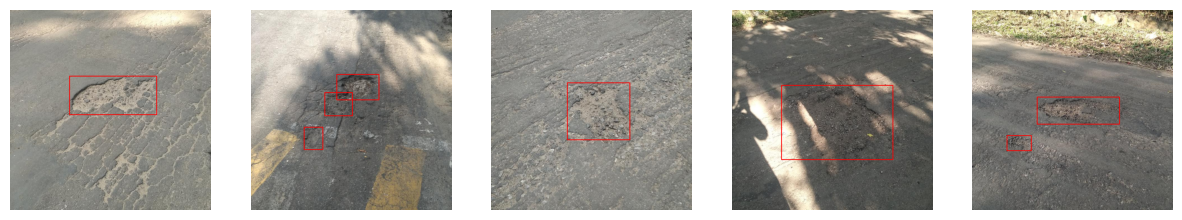

In [9]:
# Gather images and their annotations to display
num_examples = 5
image_paths = []
boxes_list = []

for i in range(1, num_examples + 1):
    xml_file = f"img-{i}.xml"
    xml_path = os.path.join(data_dir, xml_file)
    
    # Parse annotation and get corresponding image
    if os.path.exists(xml_path):
        filename, boxes = parse_annotation(xml_path)
        image_path = os.path.join(data_dir, filename)
        
        # Check if image file exists
        if os.path.exists(image_path):
            image_paths.append(image_path)
            boxes_list.append(boxes)
        else:
            print(f"Image file {filename} not found.")
    else:
        print(f"Annotation file {xml_file} not found.")

# Display all images in a single row
display_images_with_boxes(image_paths, boxes_list)